In [65]:
from scipy.stats import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

### Chi-2-Test

* Assumptions

1. Independence of the observations 

2. Both variables are categorical

3. Cells in the contingency table are mutually exclusive: an individual cannot belong to mre than one cell

4. Expected value of cells should be 5 or greater in at least 80% of cells: sample size of each cell should not be less than 5.

[REFERENCE](https://www.statology.org/chi-square-test-assumptions/)

* When to use Chi-2-Test

1. When we want to test if there is significant discrepency between sample and expected frequency

2. When we want to test if the two catogorical variables are independent.

---

### Test Frequencies

If we count the number of occurances of a category in a categorical variable, we can observe that in each count, it is a Bernoulli trial. The number of occurance of this category is simply the number of successes in a Bernoulli trial with a probability of success p. When the number of observations is large, the distribution of the number of occurances approaches to normal distribution.

![](./resources/freq_normal.PNG) 

However, we need to consider all categories in the categorical variable. There is a constraint for the occurances in all categories:

![](./resources/freq_constraint.PNG)

With this constraint, we have a random variable of chi-squared distribution. 

![](./resources/freq_chi2.PNG)

The sample and expected number of occurance is just the sample and expected frequency.

![](./resources/freq_formula.PNG)

[Thorough Proof](./resources/chi_2_test_frequencies_proof.pdf)

---

### Test Independence

The variables are independent if P(a, b) = P(a) x P(b)

![](./resources/contingency_table.PNG)

N<sub>ij</sub> is P(a, b) x N<sub>total</sub> 

If the variables are independent, the numerator should be 0.

![](./resources/ind_chi2.PNG)

![](./resources/ind_formula.PNG)

[Thorough Proof](./resources/chi_2_test_independence_proof.pdf)


---

### Question 1

Suppose colors come in 4 varieties: plastic, useful, colossal and addicted. In the pursuit of science, you find 101 colors and count how many fall into each variety. This generates the following table:

| varieties | plastic | useful | colossal | addicted |
| --- | --- | --- | --- | --- |
| frequency | 29 | 20 | 21 | 31 |

Make a bar graph showing the frequencies for each variety of colors

Make a table of the expected frequencies.

Using an alpha = 0.01 test the null hypothesis that the 101 colors are distributed evenly across the 4 varieties of plastic, useful, colossal and addicted.

* from [chi_2_test_frequencies_tutorial.pdf](./resources/chi_2_test_frequencies_tutorial.pdf)

H<sub>0</sub> : The frequency is distributed as expected across the 4 varieties.

H<sub>1</sub> : The frequency is not distributed as expected across the 4 varieties.

In [66]:
alpha = 0.01
freq_s = np.array([29, 20, 21, 31])

freq_e = np.mean(freq_s)
print("Expected Frequecy: {}".format(freq_e))
print("")

x2_s = np.square(freq_s - freq_e) / freq_e
x2 = np.sum(x2_s)
print("Chi2 of each variety: {}".format(x2_s))
print("Chi2: {}".format(x2))
print("")

k = 4
df = k - 1

p_value = 1 - chi2.cdf(x2, df=df)
x2_crit = chi2.ppf(1 - alpha, df=df)
print("p_value: {}".format(p_value))
print("x2_crit: {}".format(x2_crit))

Expected Frequecy: 25.25

Chi2 of each variety: [0.55693069 1.09158416 0.71534653 1.30940594]
Chi2: 3.6732673267326734

p_value: 0.2989753856042572
x2_crit: 11.344866730144373


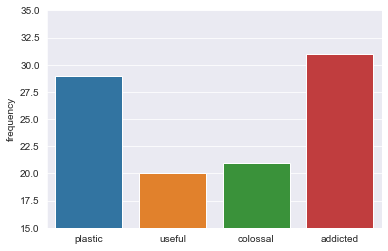

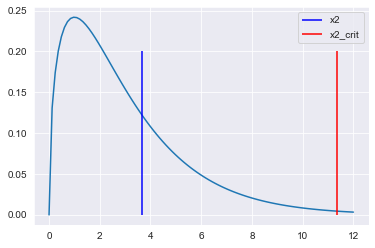

In [67]:
plt.figure(1)
plot = sns.barplot(data=[[i] for i in freq_s])
plot.set(ylabel='frequency')
plot.set_xticklabels([ "plastic", "useful", "colossal", "addicted"])
plot.set_ylim(15, 35)

plt.figure(2)
x = np.linspace(0, 12, num=100)
y = chi2.pdf(x, df=df)
plot = sns.lineplot(x=x, y=y)
plt.vlines(x2, 0, 0.2, 'b', label='x2')
plt.vlines(x2_crit, 0, 0.2, 'r', label='x2_crit')
plt.legend()

#### Ans:

Since p_value > α, we failed to reject H<sub>0</sub>. 

The frequency of 101 colors is distributed as expected across the 4 varieties of plastic, useful, colossal and addiced


---

### Question 2

Suppose statistics problems and professors come in 3 varieties: uneven, gamy and outgoing. Let's find 76 statistics problems and 63 professors and count how many fall into each variety. This generates the following table:

|| statistics problems | professors |
| --- | --- | --- |
| uneven | 35 | 13 |
|gamy | 19 | 29 |
| outgoing | 22 | 21 |

Make a table of the expected frequencies.

Using an alpha value of 0.05, test the hypothesis that the statistics problems and professors are distributed independently across the varieties of uneven, gamy and outgoing.

* from [chi_2_test_independence_tutorial.pdf](./resources/chi_2_test_independence_tutorial.pdf)



H<sub>0</sub> : The two random variables are independent.

H<sub>1</sub> : The two random variables are dependent.

In [68]:
alpha = 0.05
n_cell = np.array([[35, 13], 
                   [19, 29], 
                   [22, 21]])

n_col = np.sum(n_cell, axis=0)
n_row = np.sum(n_cell, axis=1)
n_total = np.sum(n_cell)
print("n_col: {}".format(n_col))
print("n_row: {}".format(n_row))
print("n_total: {}".format(n_total))
print("")

ni_x_nj = (np.outer(n_row, n_col) / n_total)
x2_s = np.square(n_cell - ni_x_nj) / ni_x_nj
x2 = np.sum(x2_s)
print("x2_s:")
print(x2_s)
print("x2: {}".format(x2))
print("")

k_row = 3
k_col = 2
df = (k_row - 1) * (k_col - 1)
print("df: {}".format(df))
print("")

p_value = 1 - chi2.cdf(x2, df=df)
x2_crit = chi2.ppf(1 - alpha, df=df)
print("p_value: {}".format(p_value))
print("x2_crit: {}".format(x2_crit))

n_col: [76 63]
n_row: [48 48 43]
n_total: 139

x2_s:
[[2.92086528 3.52358351]
 [1.99981265 2.4124724 ]
 [0.09708268 0.11711561]]
x2: 11.070932134923872

df: 2

p_value: 0.003944369865073294
x2_crit: 5.991464547107979


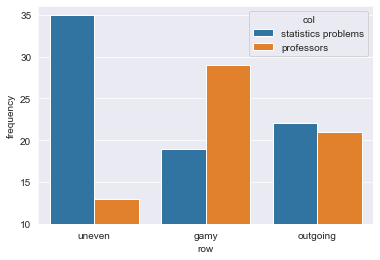

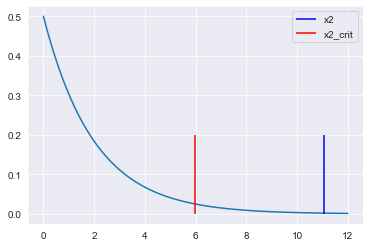

In [69]:
name_row = ["uneven", "gamy", "outgoing"]
name_col = ["statistics problems", "professors"]
df_data = pd.DataFrame(columns=["freq", "row", "col"])
for i in range(k_row):
    for j in range(k_col):
        d = { "freq": n_cell[i][j],
              "row": name_row[i],
              "col": name_col[j]}
        df_data = pd.concat([df_data, pd.DataFrame(d, index=[0])])
plt.figure(1)
plot = sns.barplot(x="row", y="freq", hue="col", data=df_data)
plot.set(ylabel='frequency')
plot.set_ylim(10, 36)

plt.figure(2)
x = np.linspace(0, 12, num=100)
y = chi2.pdf(x, df=df)
plot = sns.lineplot(x=x, y=y)
plt.vlines(x2, 0, 0.2, 'b', label='x2')
plt.vlines(x2_crit, 0, 0.2, 'r', label='x2_crit')
plt.legend()

#### Ans:

Since p_value < α, we rejected H<sub>0</sub>. 

The statistics problems and professors are not distributed independently of the varieties of uneven, gamy and outgoing.